# BIGMART SALES DATA

• BigMart Sales Data provides a detailed view of retail operations, including item 
specifics, outlet details, and sales labels. This dataset empowers businesses to 
strategically tailor product modifications and marketing efforts by understanding 
customer preferences and optimizing resources based on outlet types and sales 
trends. 

• With insights into diverse factors such as outlet size, location, and establishment 
year, businesses can make informed decisions to enhance customer engagement 
and maximize the impact of their retail strategies.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
print(df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [4]:
print(df.tail())

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004 

In [5]:
df.shape

(8523, 12)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [7]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [9]:
print(df.describe(include = 'object'))

       Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577  


In [10]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
df.dropna(inplace = True)

In [12]:
print (df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [17]:
df.duplicated()

0       False
1       False
2       False
4       False
5       False
        ...  
8517    False
8518    False
8520    False
8521    False
8522    False
Length: 4650, dtype: bool

# Sales Performance Analysis

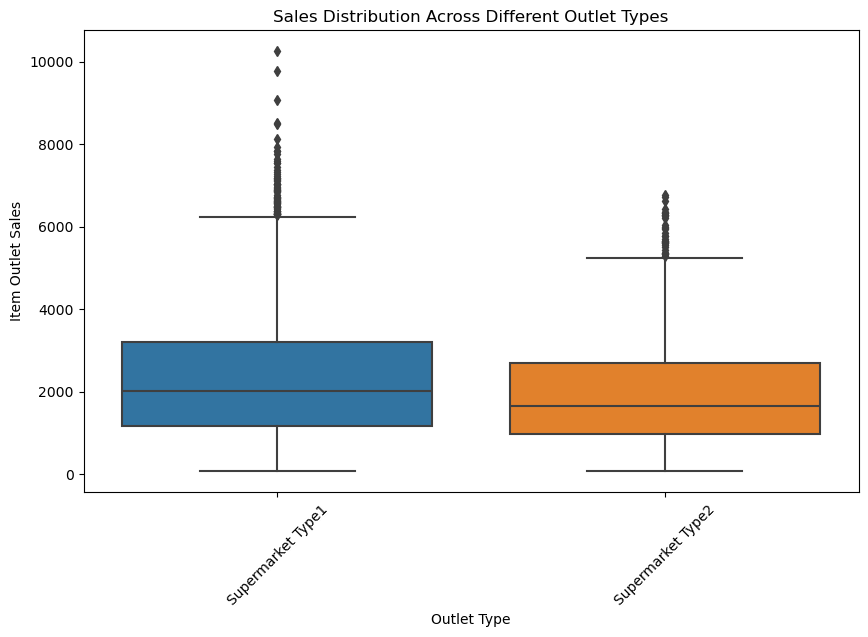

In [18]:
# 1. Overall sales distribution across different outlet types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution Across Different Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

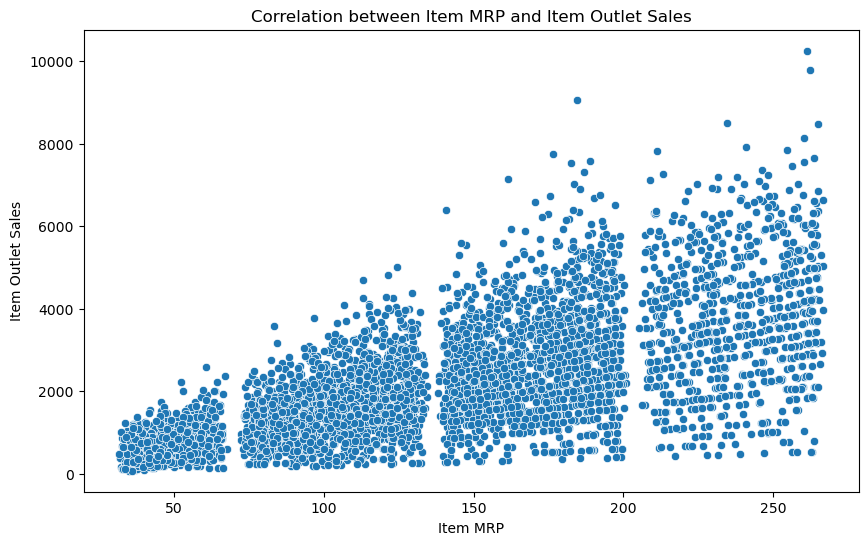

In [19]:
# 2. Correlation between item prices and item sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Correlation between Item MRP and Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()


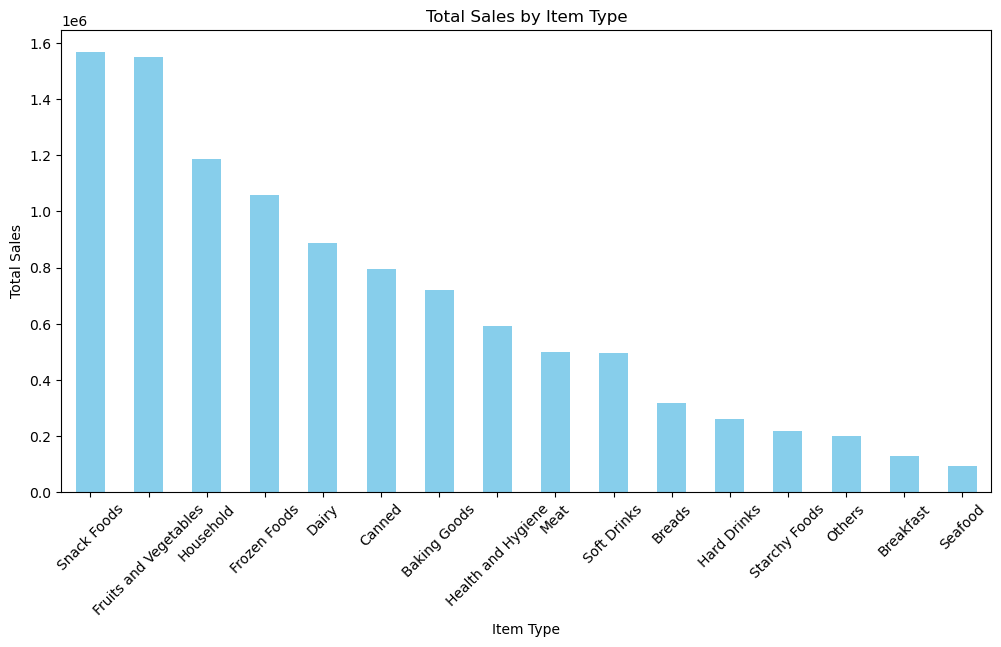

In [20]:
# 3. Items that generate the highest sales by Item_Type
sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_item_type.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

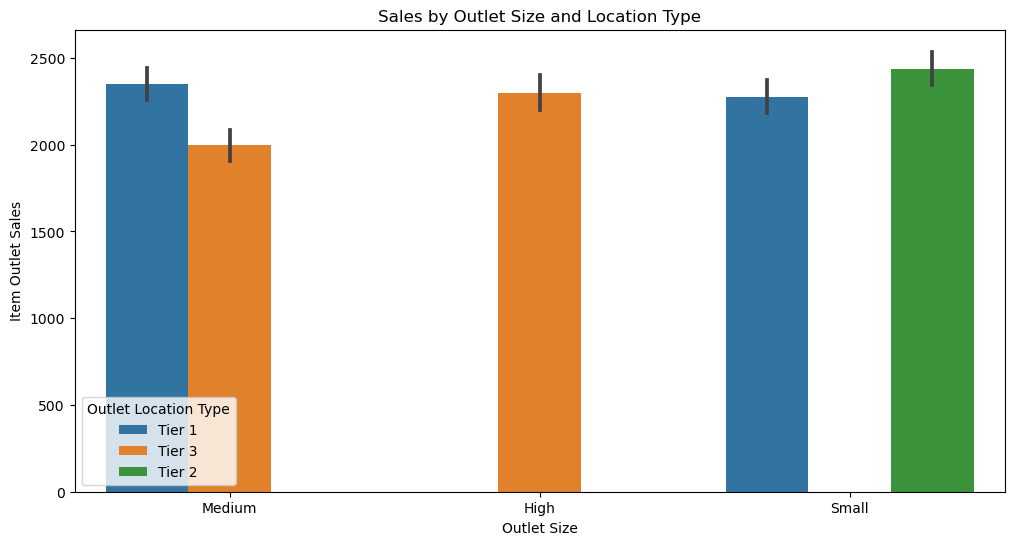

In [21]:
# 4. Sales by outlet size and location type
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=df)
plt.title('Sales by Outlet Size and Location Type')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.legend(title='Outlet Location Type')
plt.show()

# Customer Preferences

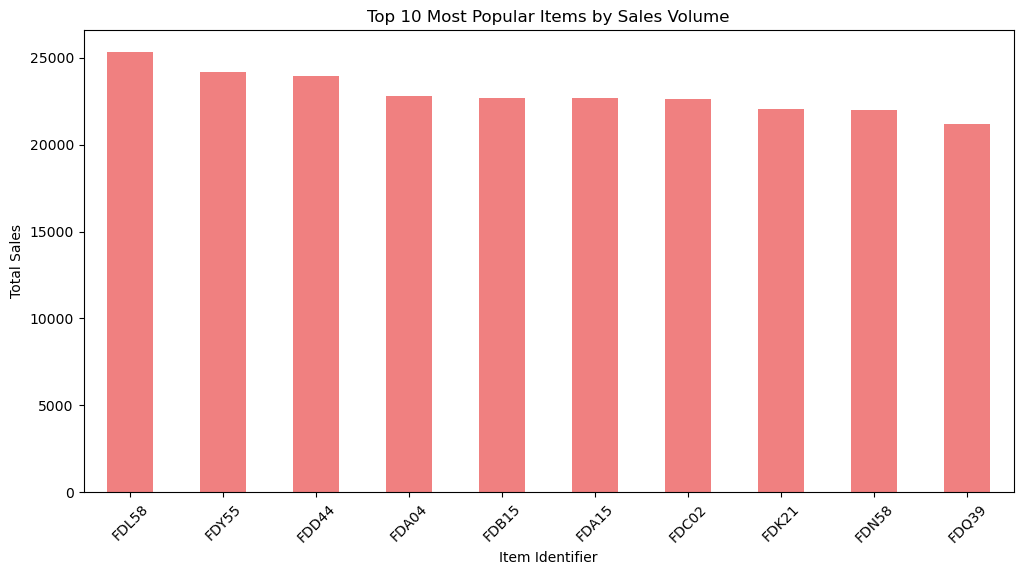

In [22]:
# 1. Most popular items based on sales volume
popular_items = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
popular_items.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Popular Items by Sales Volume')
plt.xlabel('Item Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

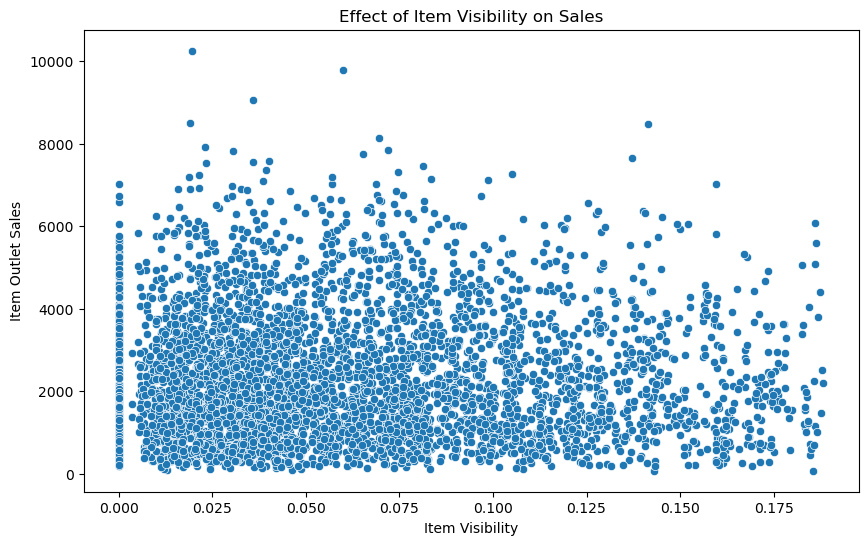

In [23]:
# 2. Effect of item visibility on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)
plt.title('Effect of Item Visibility on Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

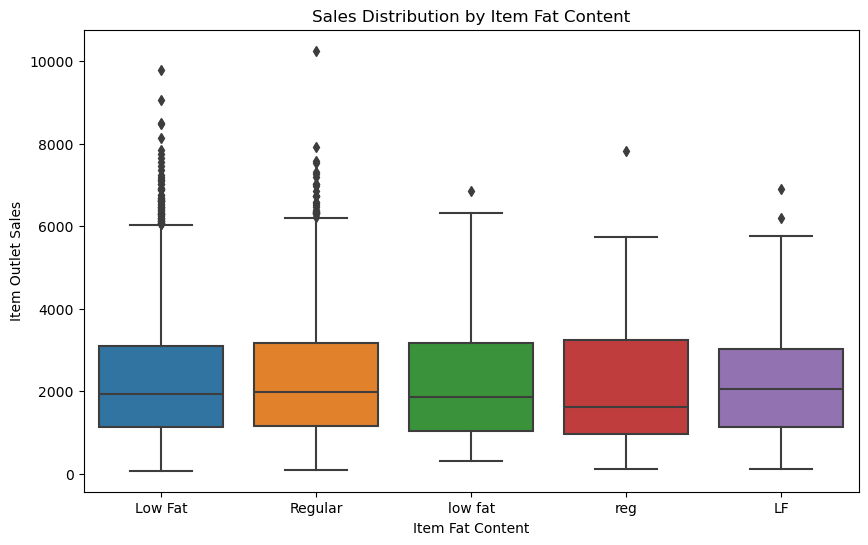

In [24]:
# 3. Difference in sales for items with different fat content
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()


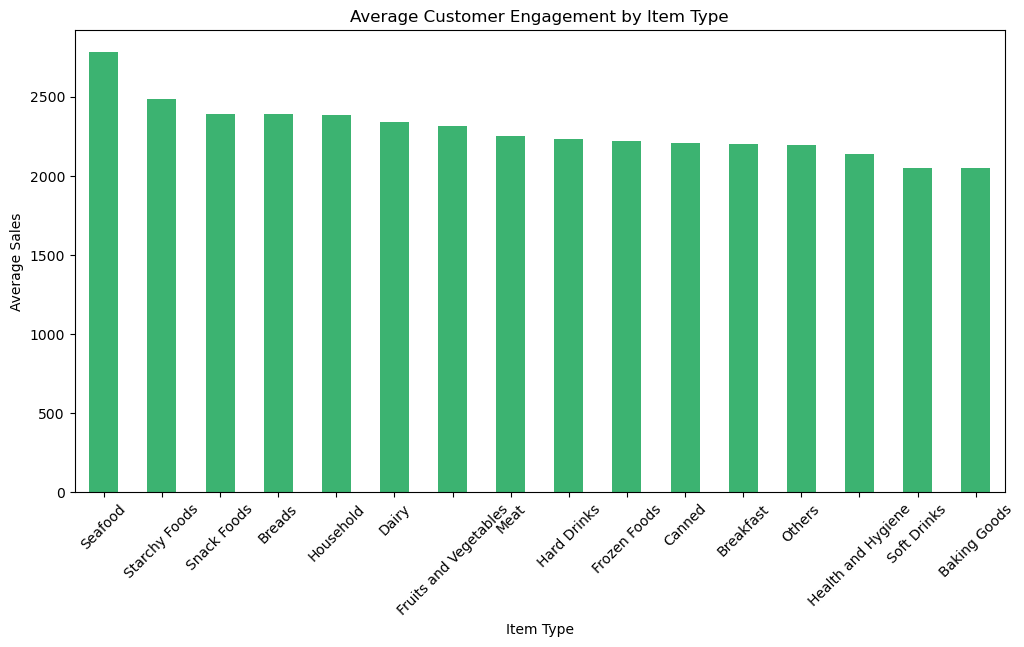

In [25]:
# 4. Item types with the highest customer engagement based on sales data
engagement_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
engagement_by_item_type.plot(kind='bar', color='mediumseagreen')
plt.title('Average Customer Engagement by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

#  Outlet Analysis

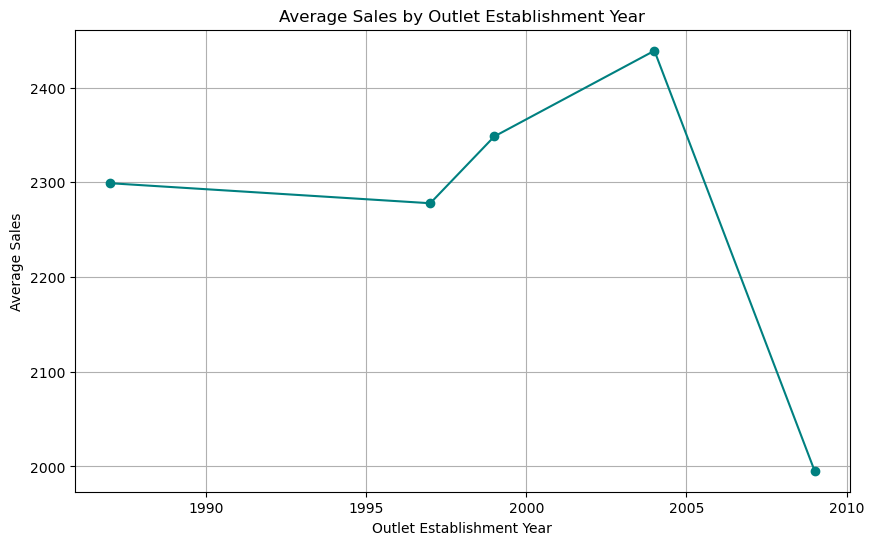

In [26]:

# 1. Trends regarding establishment year and current sales performance
plt.figure(figsize=(10, 6))
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_index()
sales_by_year.plot(kind='line', marker='o', color='teal')
plt.title('Average Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

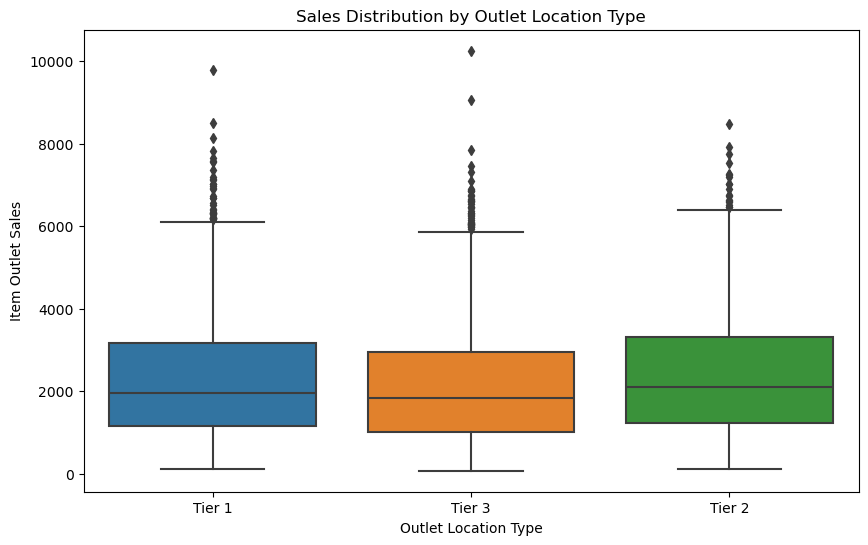

In [27]:
# 2. Impact of location type on overall sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

In [28]:
df['Outlet_Age'] = 202

# Item Characteristics

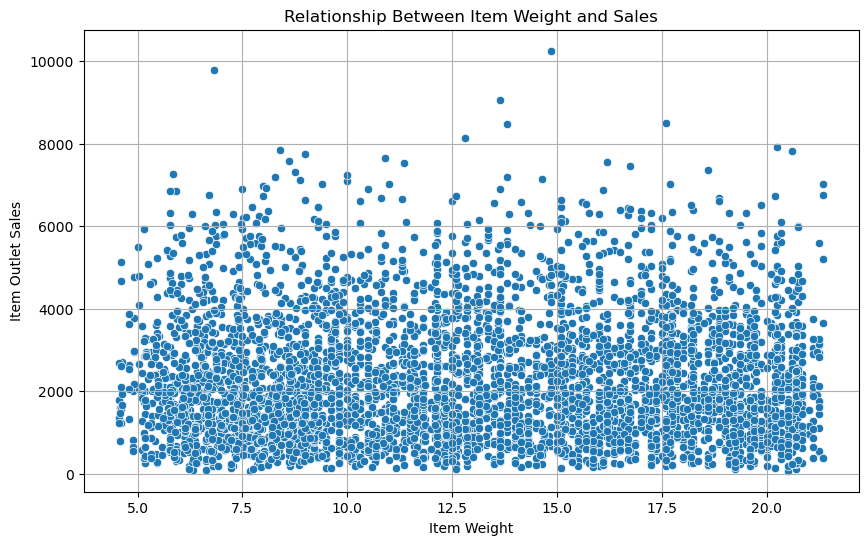

In [29]:
# 1. Relationship between item weight and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
plt.title('Relationship Between Item Weight and Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.grid(True)
plt.show()

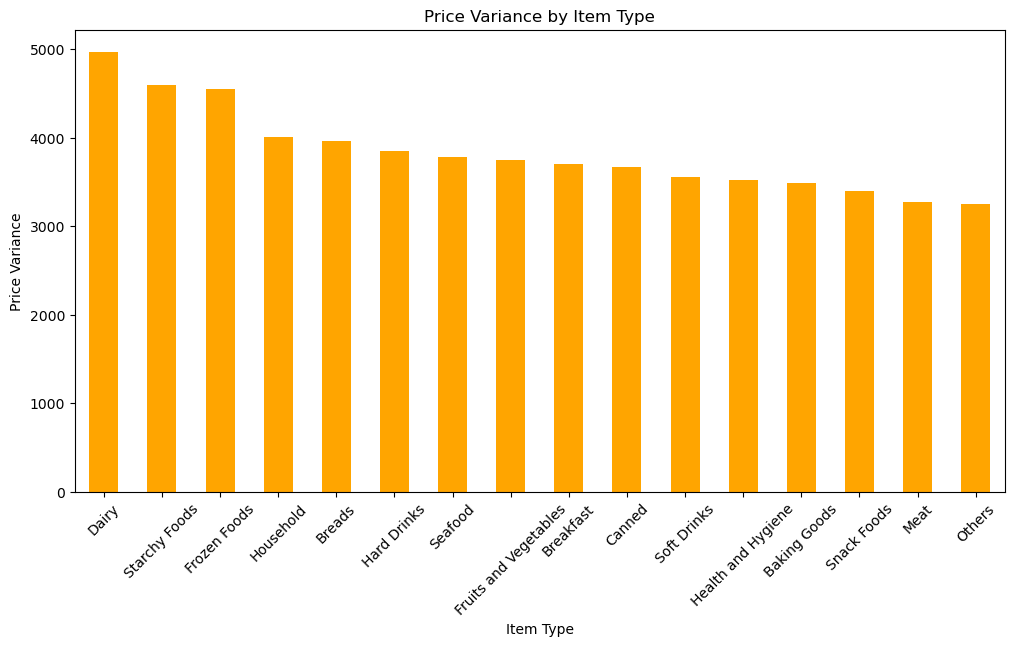

In [30]:
# 2. Item Types with the highest price variance (Item_MRP) and its effect on sales
price_variance = df.groupby('Item_Type')['Item_MRP'].var().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
price_variance.plot(kind='bar', color='orange')
plt.title('Price Variance by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Price Variance')
plt.xticks(rotation=45)
plt.show()

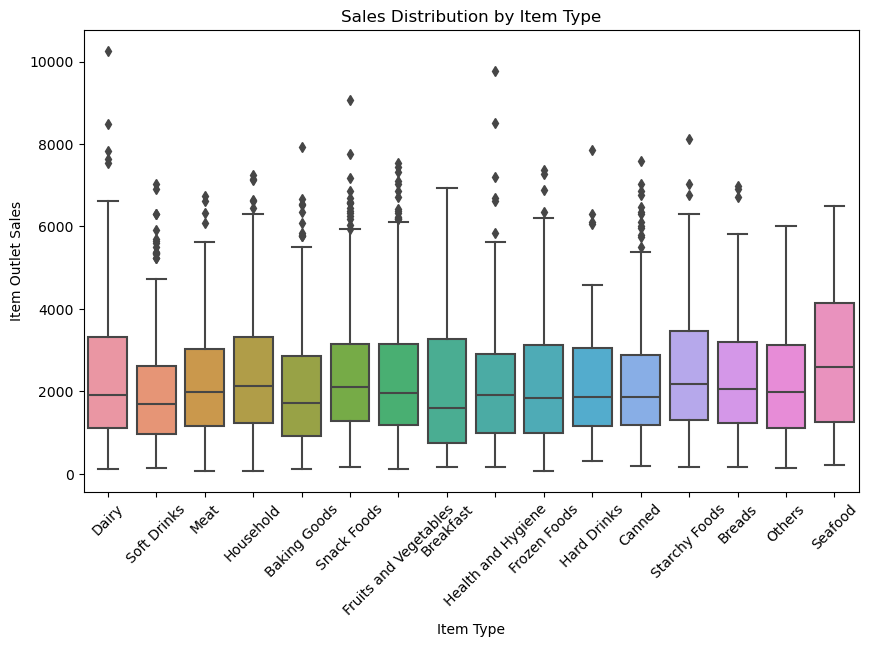

In [31]:
# Analyzing how price variance affects sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

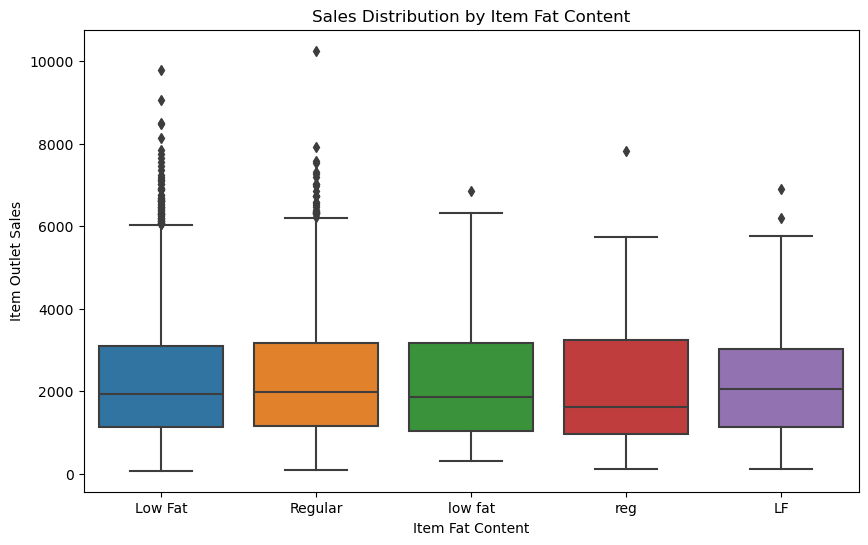

In [32]:
# 3. Identifying characteristics associated with higher sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

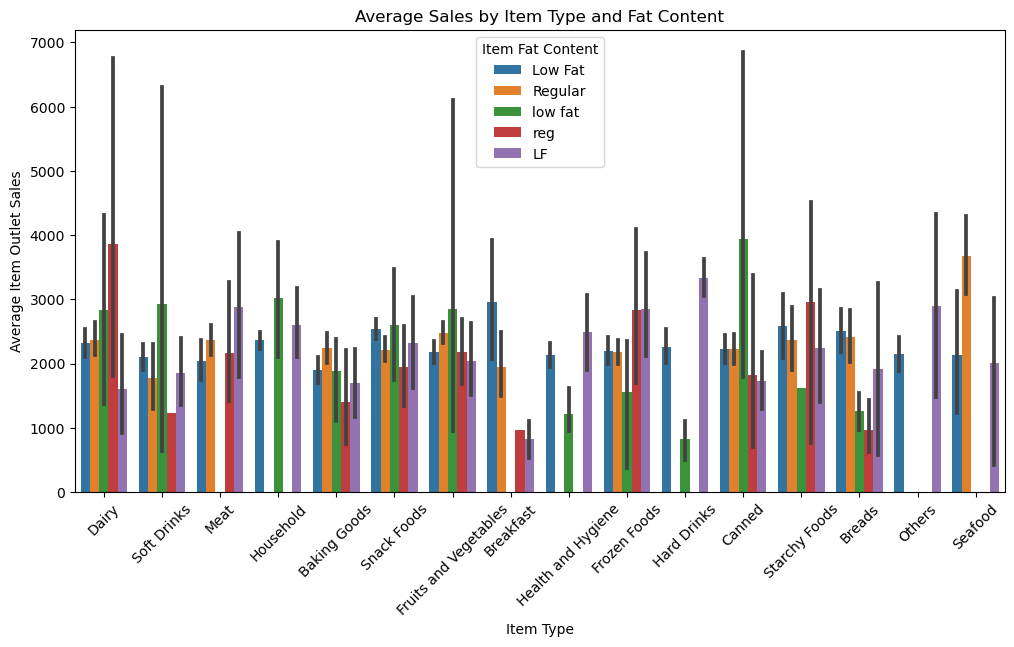

In [33]:
# Comparing sales by Item_Type and Item_Fat_Content
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df)
plt.title('Average Sales by Item Type and Fat Content')
plt.xlabel('Item Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=45)
plt.legend(title='Item Fat Content')
plt.show()

# Marketing Strategy Insights

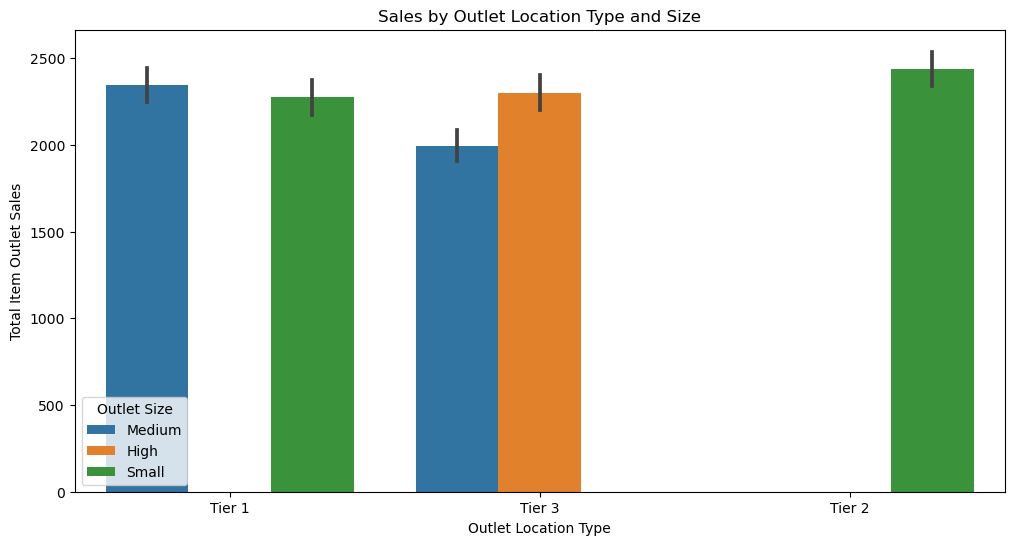

In [34]:
# 1. Demographic insights from the sales data
# Assuming the dataset contains demographic-like data, otherwise, replace it with relevant data.
# For this example, we will analyze sales data by 'Outlet_Size' and 'Outlet_Location_Type'.
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=df)
plt.title('Sales by Outlet Location Type and Size')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Item Outlet Sales')
plt.legend(title='Outlet Size')
plt.show()

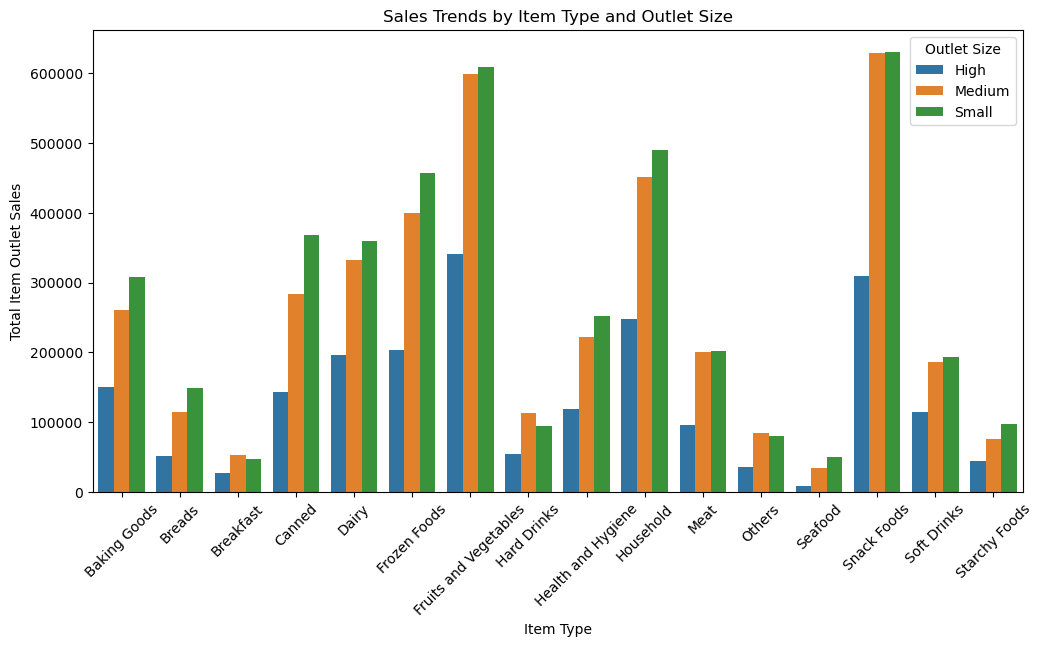

In [35]:
# 2. Adjusting inventory based on sales trends
sales_trends = df.groupby(['Item_Type', 'Outlet_Size']).agg({'Item_Outlet_Sales': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=sales_trends)
plt.title('Sales Trends by Item Type and Outlet Size')
plt.xlabel('Item Type')
plt.ylabel('Total Item Outlet Sales')
plt.xticks(rotation=45)
plt.legend(title='Outlet Size')
plt.show()

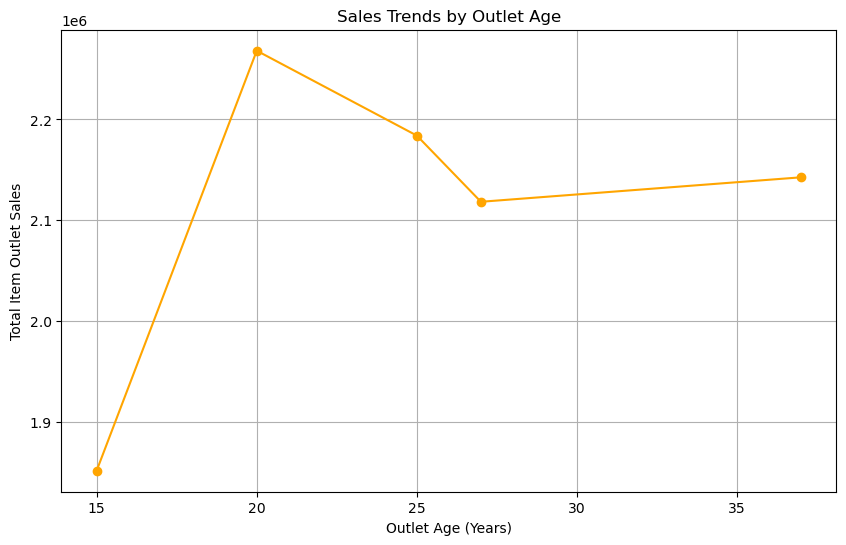

In [42]:
# 3. Identifying seasonal trends (Assuming you have date information)
# Simulating trends based on Outlet_Establishment_Year
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']  # Assuming the current year is 2024

# Group by outlet age to see trends in sales over time (assuming sales increase as outlets age)
outlet_age_sales = df.groupby('Outlet_Age')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(10, 6))
outlet_age_sales.plot(kind='line', marker='o', color='orange')
plt.title('Sales Trends by Outlet Age')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Total Item Outlet Sales')
plt.grid(True)
plt.show()



# Predictive Analysis

RMSE of the model: 1166.20


<Figure size 800x400 with 0 Axes>

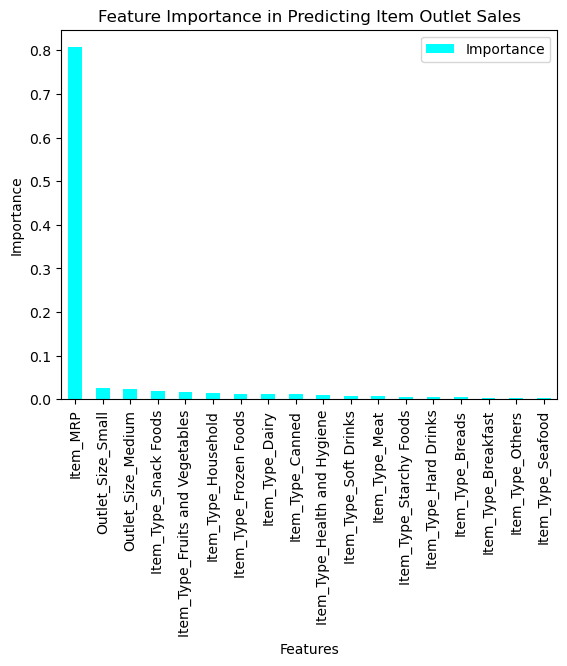

In [44]:
# Predictive Analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Select features for prediction
features = ['Item_Type', 'Outlet_Size', 'Item_MRP']
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Target variable
target = df['Item_Outlet_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE of the model: {rmse:.2f}")

# Feature importance
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 4))
feature_importances.plot(kind='bar', color='cyan')
plt.title('Feature Importance in Predicting Item Outlet Sales')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# Comparative Analysis

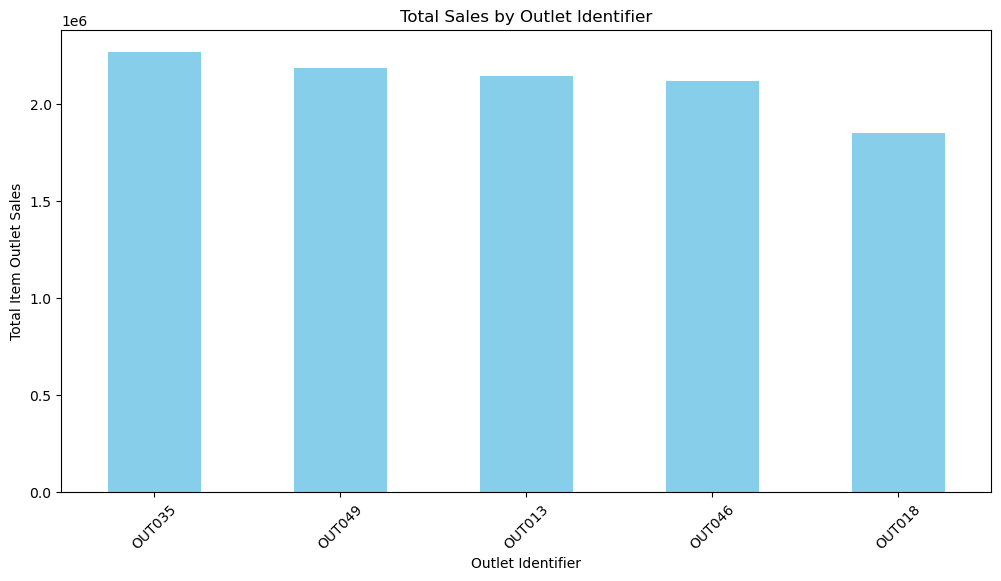

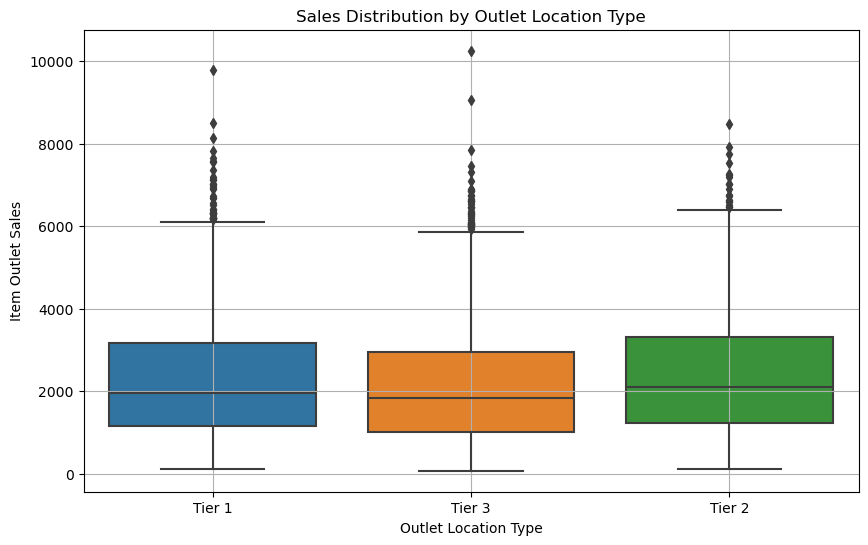

In [45]:
# 1. Sales comparison across different outlets (Outlet_Identifier)
plt.figure(figsize=(12, 6))
sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sales_by_outlet.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Outlet Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

# 2. Differences in sales between urban and rural outlets based on Outlet_Location_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.grid(True)
plt.show()


# Visualizations

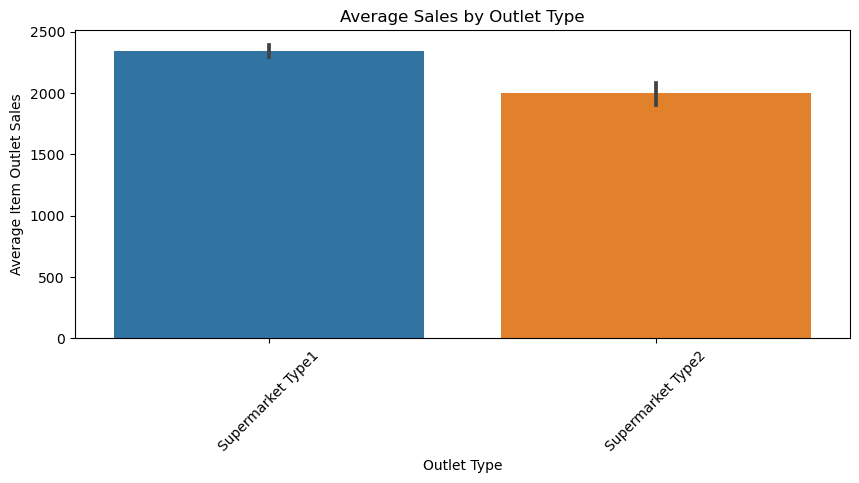

In [47]:
# 1. Visualizing trends in sales by outlet type
plt.figure(figsize=(10, 4))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

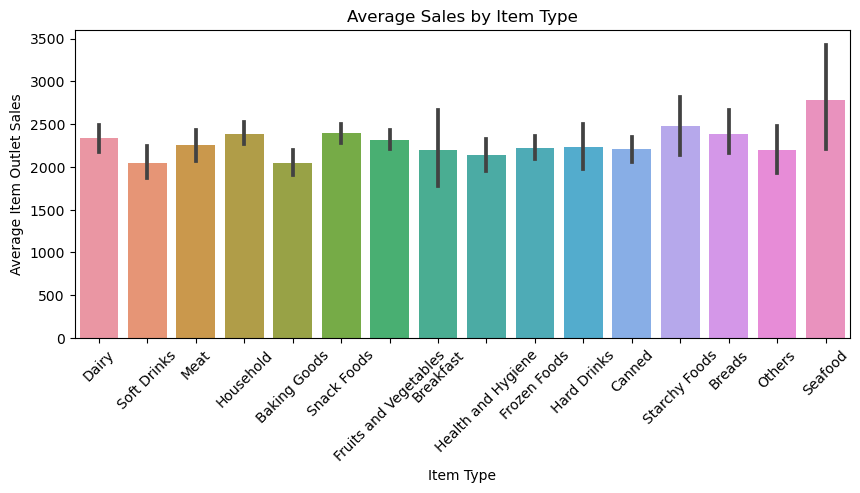

In [48]:
# 2. Visualizing trends in sales by item type
plt.figure(figsize=(10, 4))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

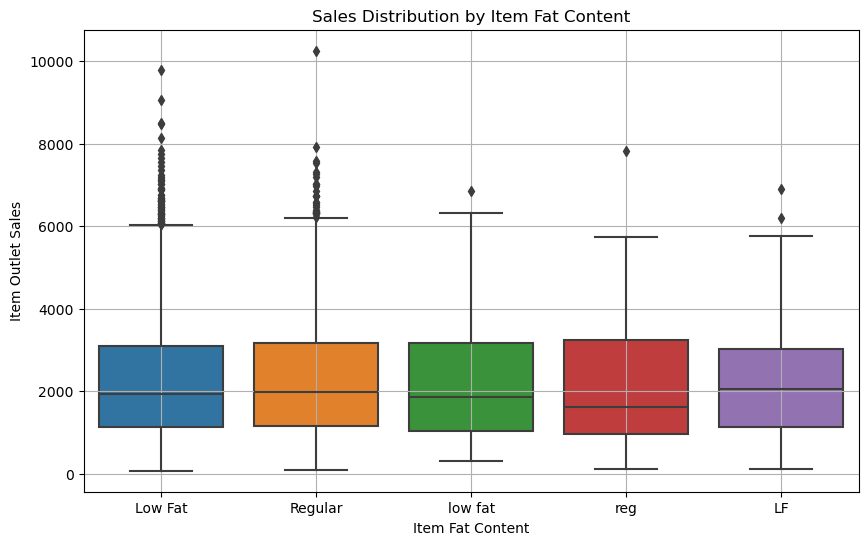

In [49]:
# 3. Visualizing trends in sales by fat content
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.grid(True)
plt.show()

In [50]:
# 4. Visualizing sales trends over time (assuming a date-related column is present)
# Create a hypothetical month column if date information is not available
df['Month'] = pd.to_datetime(df['last_review'], errors='coerce').dt.month
monthly_sales_trends = df.groupby('Month')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(10, 6))
monthly_sales_trends.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Item Outlet Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

KeyError: 'last_review'